# 01 Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Define path and Import Data

In [2]:
path = r'/Users/carlo/21-06-2022 Instacart Basket Analysis'

In [4]:
df_customer = pd.read_csv(os.path.join(path, '2. Data', 'Original data', 'customers.csv'), index_col = False)

In [5]:
# Check output

df_customer.shape

(206209, 10)

In [6]:
df_customer.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [7]:
#Info on df number of rows and columns and data types
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


# 03 Data Wrangling and rename columns drop columns that has nothing to do with the analysis

In [8]:
# Rename columns for easier reading

df_customer.rename(columns = {'n_dependants' : 'number_of_dependants'}, inplace = True)

In [9]:
df_customer.rename(columns = {'First Name' : 'first_name'}, inplace = True)

In [10]:
df_customer.rename(columns = {'Gender': 'gender'}, inplace=True)

In [11]:
df_customer.rename(columns = {'STATE' : 'state'}, inplace = True)

In [12]:
df_customer.rename(columns = {'Age': 'age'}, inplace=True)

In [13]:
df_customer.rename(columns = {'Surnam' : 'surname'}, inplace = True)

In [14]:
df_customer.rename(columns = {'fam_status' : 'family_status'}, inplace = True)

In [15]:
df_customer.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [16]:
df_customer.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'family_status', 'income'],
      dtype='object')

# 04 Check for duplicates and missing data. Also convert mixed up data

In [17]:
# Find missing values

df_customer.isnull().sum()

user_id                     0
first_name              11259
surname                     0
gender                      0
state                       0
age                         0
date_joined                 0
number_of_dependants        0
family_status               0
income                      0
dtype: int64

In [18]:
#Show missing values
df_customer['first_name'].value_counts(dropna = False)

NaN        11259
Marilyn     2213
Barbara     2154
Todd        2113
Jeremy      2104
           ...  
Merry        197
Eugene       197
Garry        191
Ned          186
David        186
Name: first_name, Length: 208, dtype: int64

In [19]:
#Creating subset for duplicates
df_dups = df_customer[df_customer.duplicated()]

In [20]:
df_dups.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income


In [21]:
#Find columns with mixed data types
for col in df_customer.columns.tolist():
  weird = (df_customer[[col]].applymap(type) != df_customer[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_customer[weird]) > 0:
    print (col)

first_name


In [22]:
#Change data type
df_customer['first_name'] = df_customer['first_name'].astype('str')

# 05 Combine Data

In [23]:
#Import data
df_merge = pd.read_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'orders_products_grouped.pkl'))

In [24]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 26 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   Unnamed: 0_x           int64   
 1   order_id               int32   
 2   user_id                int32   
 3   order_number           int8    
 4   orders_day_of_week     int8    
 5   order_hour_of_day      int8    
 6   days_since_last_order  float16 
 7   product_id             float64 
 8   add_to_cart_order      float64 
 9   reordered              float64 
 10  Unnamed: 0_y           int64   
 11  product_name           object  
 12  aisle_id               int64   
 13  department_id          int64   
 14  prices                 float64 
 15  _merge                 category
 16  price_range            object  
 17  busiest_day            object  
 18  busiest_days           object  
 19  busiest_period_of_day  object  
 20  max_order              int8    
 21  loyalty_flag           object

# Plan A - for Merge and change types in data

In [25]:
#Drop _merge & unnamed
df_merge = df_merge.drop(columns = ['_merge'])
df_merge = df_merge.drop(columns = ['Unnamed: 0_y'])
df_merge = df_merge.drop(columns = ['Unnamed: 0_x'])

In [26]:
# Change types 
df_merge['order_id']=df_merge['order_id'].astype('int32')
df_merge['user_id'] = df_merge['user_id'].astype('int32')
df_merge['order_number']=df_merge['order_number'].astype('int8')
df_merge['orders_day_of_week']=df_merge['orders_day_of_week'].astype('int8')
df_merge['order_hour_of_day']=df_merge['order_hour_of_day'].astype('int8')
df_merge['days_since_last_order']=df_merge['days_since_last_order'].astype('float16')

In [27]:
df_merge['product_id'] =df_merge['product_id'].astype('int32')
df_merge['reordered']=df_merge['reordered'].astype('int8')
df_merge['add_to_cart_order']=df_merge['add_to_cart_order'].astype('int32')

In [28]:
df_merge['order_id']=df_merge['order_id'].astype('int32')
df_merge['aisle_id'] = df_merge['aisle_id'].astype('int8')

In [29]:
df_merge['department_id'] = df_merge['department_id'].astype('int8')
df_merge['prices'] = df_merge['prices'].astype('float32')

In [30]:
df_merge['mean_spending'] = df_merge['mean_spending'].astype('float16')

In [31]:
df_customer['age'] = df_customer['age'].astype('int8')
df_customer['number_of_dependants'] = df_customer['number_of_dependants'].astype('int8')
df_customer['income'] = df_customer['income'].astype('int32')
df_customer['user_id'] = df_customer['user_id'].astype('int32')

In [32]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int32  
 1   user_id                int32  
 2   order_number           int8   
 3   orders_day_of_week     int8   
 4   order_hour_of_day      int8   
 5   days_since_last_order  float16
 6   product_id             int32  
 7   add_to_cart_order      int32  
 8   reordered              int8   
 9   product_name           object 
 10  aisle_id               int8   
 11  department_id          int8   
 12  prices                 float32
 13  price_range            object 
 14  busiest_day            object 
 15  busiest_days           object 
 16  busiest_period_of_day  object 
 17  max_order              int8   
 18  loyalty_flag           object 
 19  mean_spending          float16
 20  spender_flag           object 
 21  order_frequency        float16
 22  frequency_flag  

In [33]:
df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spending,spender_flag,order_frequency,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer


In [34]:
#Merge
df_merged = df_customer.merge(df_merge, on = 'user_id', how = 'inner',indicator = True)

In [35]:
#Checking match
df_merged['_merge'].value_counts()

both          32404859
left_only            0
right_only           0
Name: _merge, dtype: int64

In [36]:
df_merged.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spending,spender_flag,order_frequency,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both


# 06 Export data

In [37]:
df_merged.to_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'ex49full_merge.pkl'))

# 07 Second part. Path already defined. Now just to import data and name a function named "full_merge". 

In [38]:
# Import data

full_merge = pd.read_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'ex49full_merge.pkl'))

In [39]:
# Check output.

full_merge.shape

(32404859, 33)

In [40]:
full_merge.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spending,spender_flag,order_frequency,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both


In [41]:
full_merge.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'family_status', 'income',
       'order_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices', 'price_range',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_spending', 'spender_flag', 'order_frequency',
       'frequency_flag', '_merge'],
      dtype='object')

# 08 creating a bar and histogram charts

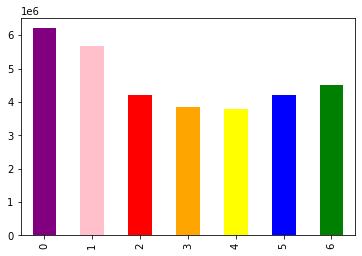

In [43]:
# Create bar chart

#Create bar chart - orders per day of the week
bar = full_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'pink', 'red', 'orange', 'yellow', 'blue', 'green'])

In [44]:
#Export visualization
bar.figure.savefig(os.path.join(path, '4. Analysis', 'barchart_4_9.png'))

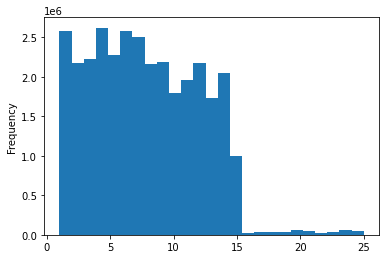

In [45]:
# Create histogram

hist = full_merge['prices'].plot.hist(bins = 25)

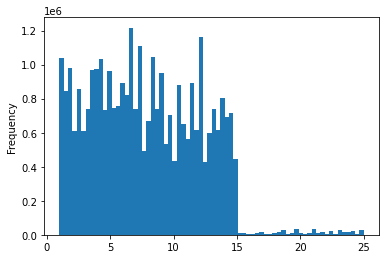

In [46]:
#Create histogram2 - prices
hist2 = full_merge['prices'].plot.hist(bins = 70)

In [47]:
#Export visualization
hist2.figure.savefig(os.path.join(path, '4. Analysis', 'histogram_4_9.png'))

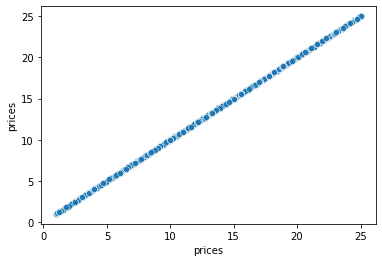

In [48]:
# Create scatterplot

scatter_plot = sns.scatterplot(x = 'prices', y = 'prices', data = full_merge)

In [49]:
#Export visualization
scatter_plot.figure.savefig(os.path.join(path, '4. Analysis', 'splotchart_4_9.png'))

# 07 Creating a Line Chart

In [50]:
#Find columns with mixed data types
for col in full_merge.columns.tolist():
  weird = (full_merge[[col]].applymap(type) != full_merge[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (full_merge[weird]) > 0:
    print (col)

price_range
frequency_flag


In [51]:
#Creating a sample
#Set seed for random number generator
np.random.seed(4)
#Create list holding boolean values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(full_merge)) <= 0.7

In [52]:
#Splitting df
#Store 70% of sample in df big
big = full_merge[dev]
#Store 30% of smaple in df small
small = full_merge[~dev]

In [53]:
#Compare sample size with entire df
len(full_merge)

32404859

In [54]:
len(big)+len(small)

32404859

In [55]:
#Reducing sample to necessary columns
df_2 = small[['orders_day_of_week','prices']]

In [56]:
df_2.describe()

,orders_day_of_week,prices
count,9.721098e+06,9.719495e+06
mean,2.739057e+00,7.796677e+00
std,2.089876e+00,4.217781e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.200000e+00
50%,3.000000e+00,7.400000e+00
75%,5.000000e+00,1.130000e+01
max,6.000000e+00,2.500000e+01


In [57]:
df_2.groupby('orders_day_of_week').agg({'prices': ['mean']})

,prices
,mean
orders_day_of_week,
0,7.860040
1,7.753977
2,7.757402
3,7.758079
4,7.750344
5,7.760267
6,7.856239


In [58]:
full_merge.groupby('orders_day_of_week').agg({'prices': ['mean']})

,prices
,mean
orders_day_of_week,
0,7.857590
1,7.759696
2,7.754309
3,7.757485
4,7.756223
5,7.762477
6,7.857431


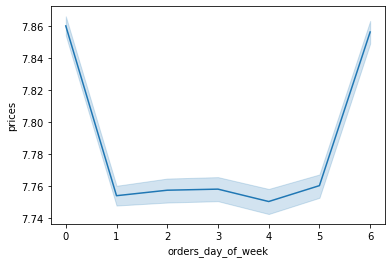

In [59]:
#Create line chart - price development per week
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [60]:
#Export viz
line.figure.savefig(os.path.join(path, '4. Analysis', 'linechart_4_9.png'))

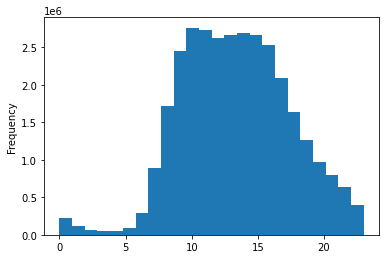

In [61]:
hist_hour = full_merge['order_hour_of_day'].plot.hist(bins = 24)

In [62]:
#Export viz
hist_hour.figure.savefig(os.path.join(path, '4. Analysis', 'histogram_hour_4_9.png'))

# The histogram above shows how many orders are placed in each time of the day. The X Axis represent the time (0 to 23 hours) and Y axis represent how many orders are placed ( in million of orders)¶

In [63]:
# Check histogram accuracy

full_merge['order_hour_of_day'].value_counts(dropna=False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

# 08 bar Chart for customer loyalty

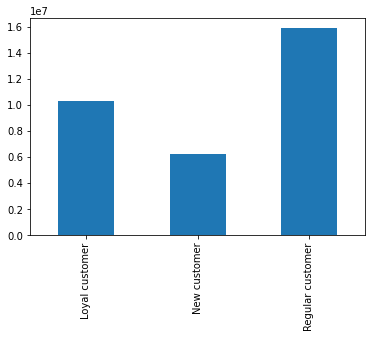

In [64]:
#Create bar chart - customer loyalty
bar2 = full_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

In [65]:
#Export viz
bar2.figure.savefig(os.path.join(path, '4. Analysis', 'barchart_loyalty_4_9.png'))

# 09 Check if there is a difference in expendidure in certain hours during the day

In [66]:
#Reducing sample to order_hour_of_day & prices
df_3 = small[['order_hour_of_day','prices']]

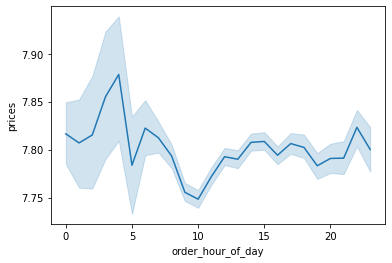

In [67]:
#Create line chart - price development throughout the day
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [68]:
#Export viz
line2.figure.savefig(os.path.join(path, '4. Analysis', 'linechart_prices_hour_4_9.png'))

# 10 Is there a connection between family Status and age?

In [69]:
#Reducing sample to age & number of dependants
df_4 = small[['age','number_of_dependants']]

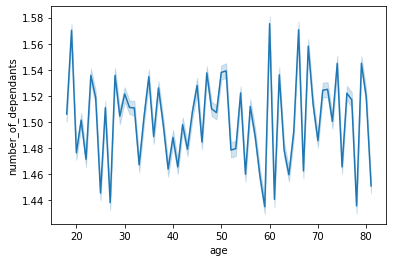

In [70]:
#Create line chart - 
line3 = sns.lineplot(data = df_4, x = 'age',y = 'number_of_dependants')

In [71]:
#Export viz
line3.figure.savefig(os.path.join(path, '4. Analysis', 'linechart_age_deps_4_9.png'))

# The line shart represents the age of the customer with the number of dependents. The range of dependents are very small, (1.42 and 1.58) so there is no strong correlation between Instacard customer age and how many dependents a customer have

# 11 Is there a relationship between expendidure and age?

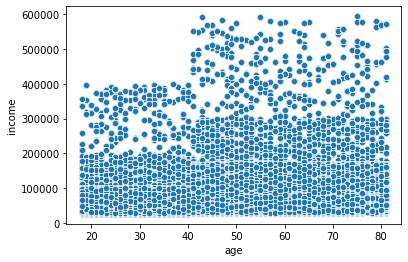

In [72]:
#Create scatterplot - age & spending power
scatter2 = sns.scatterplot(x = 'age', y = 'income',data = full_merge)

In [73]:
#Export viz
scatter2.figure.savefig(os.path.join(path, '4. Analysis', 'scatterplot_spending_power_4_9.png'))